# TASK: 3 CUISINE CLASSIFICATION


In [42]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
file_path = r'C:\Users\manis\OneDrive\Desktop\Dataset .csv'
data = pd.read_csv(file_path)

In [4]:

# Handle missing values (assuming missing values are represented as NaN)
data.fillna(value='', inplace=True)


In [27]:
# Explore the dataset to understand its structure and contents
print(data.head())
print(data.info())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [28]:

# Preprocessing: Splitting data into features (X) and target (y)
X = data['Restaurant Name']  # Assuming 'Restaurant Name' contains the textual data
y = data['Cuisines']  # Assuming 'Cuisine Category' is the target variable


In [29]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Vectorizing the textual data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)


In [33]:
# Training the classifier (Multinomial Naive Bayes)
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)


MultinomialNB()

In [35]:
# Making predictions
y_pred = classifier.predict(X_test_vect)


In [36]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.2548403976975406


In [37]:
# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         1
          39       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1
          46       0.00     

C:\Users\manis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


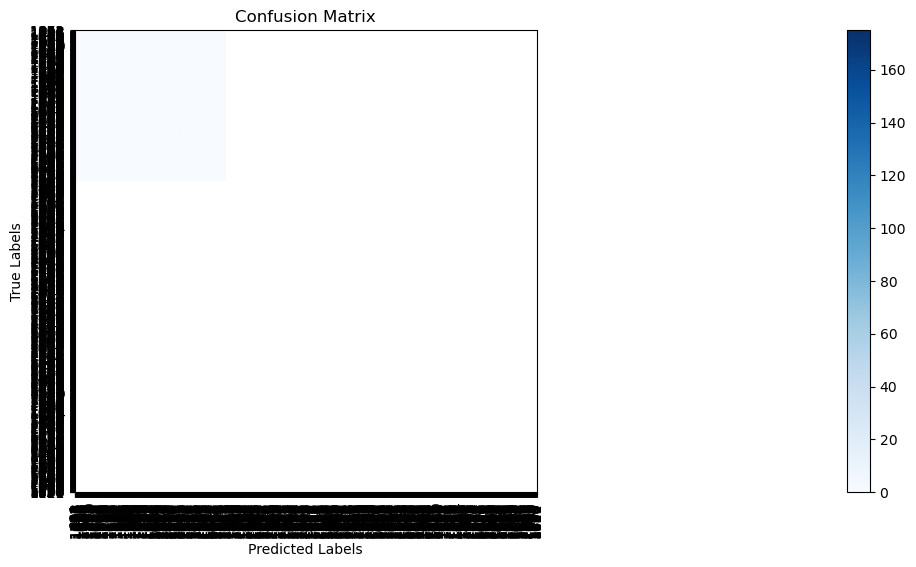

In [40]:
# Visualizing the Confusion Matrix
plt.figure(figsize=(80, 6))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=range(len(data['Cuisines'].unique())), labels=data['Cuisines'].unique(), rotation=90)
plt.yticks(ticks=range(len(data['Cuisines'].unique())), labels=data['Cuisines'].unique())
plt.show()

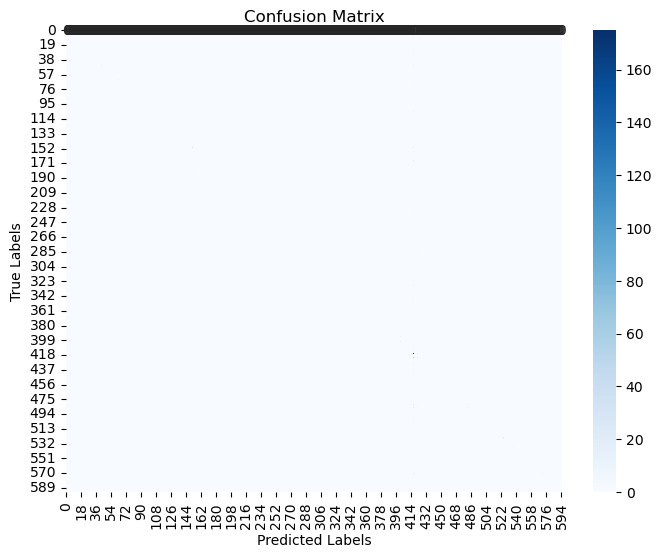

In [43]:
# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

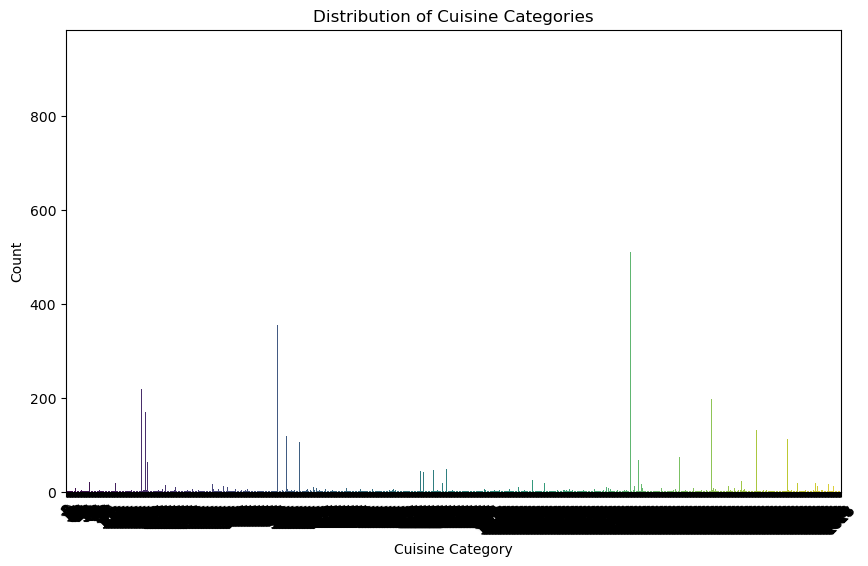

In [44]:

# Visualizing the distribution of Cuisine Categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Cuisines', data=data, palette='viridis')
plt.title('Distribution of Cuisine Categories')
plt.xlabel('Cuisine Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


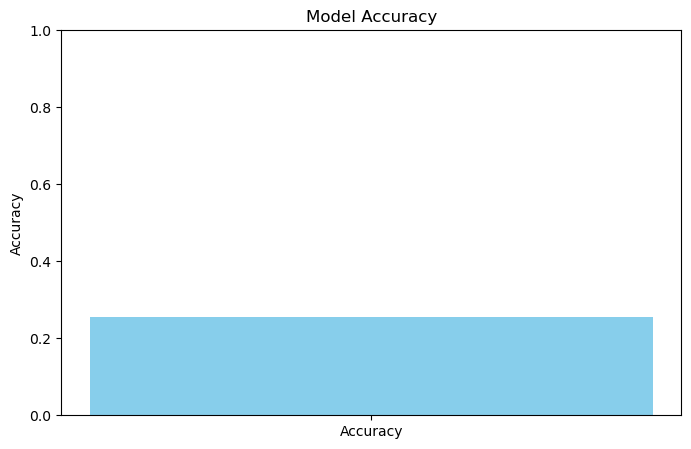

In [45]:

# Visualizing the accuracy of the model
plt.figure(figsize=(8, 5))
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

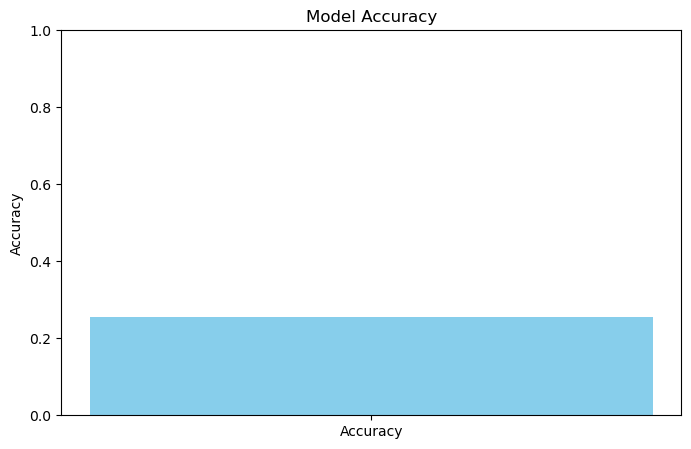

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         1
          39       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1
          46       0.00      0.00      0.00         1
          47       0.00      0.00      0.00         1
          49       0.00      0.00      0.00         1
    

In [46]:
# Visualizing the accuracy of the model
plt.figure(figsize=(8, 5))
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Displaying the Classification Report
print('Classification Report:')
print(class_report)